### Multiclass data classification

The second problem considered is the multi-class classification task. For this purpose, we will use the well-known Reuters database, published in $1986$, which contains a set of short press articles on $46$ various topics. Of course, each note is classified into only one topic, and each topic has at least $10$ examples in the training data set. Additionally, the Reuters dataset is part of the Keras package. Below we present a fragment of the code whose task is to load the set into the appropriate data tensors.

In [1]:
from tensorflow.keras.datasets import reuters

L=100
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=L+4)

This way we can load both the training and the test sets. The **num_words** parameter specifies the maximum number of most frequently occurring keywords. In the analyzed case, this is a number defined as $L$. We add the value $4$ here because the symbols $0$ to $3$ do not describe keywords, similarly to the IMDb database. An example note for $L=100$ might look like this:

In [2]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 2, 5, 25, 2, 2, 5, 2, 2, 16, 2, 2, 90, 67, 7, 89, 5, 19, 102, 6, 19, 2, 15, 90, 67, 84, 22, 2, 26, 7, 48, 4, 49, 8, 2, 39, 2, 2, 6, 2, 6, 83, 11, 15, 22, 2, 11, 15, 7, 48, 9, 2, 2, 2, 6, 2, 6, 2, 11, 15, 22, 2, 44, 11, 15, 16, 8, 2, 2, 90, 67, 52, 29, 2, 30, 32, 2, 6, 2, 15, 17, 12]


where individual numbers indicate word indexes in the keyword dictionary. Of course, based on the vector above, we can recreate the note using the code below:

In [3]:
def decode_data(data):

    dictionary=reuters.get_word_index()
    my_dictionary=dict([(k,v) for (v,k) in dictionary.items()])
    s=' '.join([my_dictionary.get(d-3,'?') for d in data])
    return s

print(decode_data(train_data[0]))

? ? ? said as a ? of its ? ? of ? ? it ? ? per share in 1987 of 1 15 to 1 ? dlrs per share up from ? cts in 1986 the company said ? net ? ? to ? to 10 mln dlrs from ? mln dlrs in 1986 and ? ? ? to ? to ? mln dlrs from ? 5 mln dlrs it said ? ? per share this year ? be 2 ? to ? dlrs reuter 3


Input data vectors read straight from the database cannot be directly used in the training process, similarly to the previously discussed example. Therefore, it is required to transform them into vectors of fixed length, independent of a specific article. For this purpose, we use a function analogous to the previous example.

In [5]:
import numpy as np

def prepare_data(name,data,labels):
    global L

    x=np.zeros((len(data),L),float)
    y=np.zeros((len(data),46),float)
    for i in range(0,len(data)):
        for j in data[i]:
            if (j>=4):
                x[i][j-4]+=1.0
        if (np.linalg.norm(x[i])>0):
            x[i]/=np.linalg.norm(x[i])
        y[i][labels[i]]=1.0
    np.save(name+'_data.npy',x)
    np.save(name+'_labels.npy',y)
    return

prepare_data('train',train_data,train_labels)
prepare_data('test',test_data,test_labels)

After processing, vectors are saved in files with the extension "\*.npy". Note that for the Reuters database we have $8982$ vectors in the training set and $2246$ in the test set. The vectors expected at the output are vectors with $46$ elements and have one value equal to $1$, which determines belonging to one selected class, and the remaining elements are zeroed.

The process of training a network model begins with loading training vectors and dividing them into a training and validation set. We use the following code for this:

In [6]:
train_x=np.load('train_data.npy')
train_y=np.load('train_labels.npy')
test_x=np.load('test_data.npy')
test_y=np.load('test_labels.npy')
N=len(train_x)
N2=N//2
(train2_x,validate_x)=(train_x[0:N2],train_x[N2:N])
(train2_y,validate_y)=(train_y[0:N2],train_y[N2:N])

The network training model itself, as well as the structure of the neural network, are topologically similar to the structure considered in the previous task. We therefore use the same number of hidden layers, i.e. three layers, but the size of the input data and, in particular, the output data changes. In the case under consideration, we have $46$ of different classes, which means that we must have $46$ of neurons in the last layer of the network. The following code creates and compiles a network training model.

In [10]:
import tensorflow as tf

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='relu'))
model.add(tf.keras.layers.Dense(46,activation='softmax'))
model.build(input_shape=(N,L))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In our example model, we use $2$ neurons in the first and second hidden layers. The activation function in these layers is the ReLU function. Those numbers may be not enough.

In the last layer, i.e. the output layer, which has $46$ neurons, we use the "softmax" activation function for obvious reasons. This function causes the network output, in response to the input vector, to obtain a probability distribution of the input vector belonging to $46$ possible classes. The model compilation assumes the use of the Adam optimizer, and the loss function is categorical cross-correlation (see the previous section). When training the network, we will also use the classification accuracy metric "accuracy". The training process itself is started using the following code:

In [11]:
history=model.fit(train2_x,train2_y,epochs=50,validation_data=(validate_x,validate_y),verbose=True)
tf.keras.models.save_model(model,'model_multiclass.h5')

Epoch 1/50
141/141 [==============================] - 1s 4ms/step - loss: 3.6931 - accuracy: 0.1810 - val_loss: 3.4523 - val_accuracy: 0.1690
Epoch 2/50
141/141 [==============================] - 0s 3ms/step - loss: 3.0746 - accuracy: 0.3327 - val_loss: 2.6637 - val_accuracy: 0.3556
Epoch 3/50
141/141 [==============================] - 0s 3ms/step - loss: 2.5132 - accuracy: 0.3478 - val_loss: 2.3578 - val_accuracy: 0.3556
Epoch 4/50
141/141 [==============================] - 0s 3ms/step - loss: 2.3281 - accuracy: 0.3478 - val_loss: 2.2284 - val_accuracy: 0.3556
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 2.2299 - accuracy: 0.3478 - val_loss: 2.1543 - val_accuracy: 0.3556
Epoch 6/50
141/141 [==============================] - 0s 3ms/step - loss: 2.1731 - accuracy: 0.3478 - val_loss: 2.1092 - val_accuracy: 0.3556
Epoch 7/50
141/141 [==============================] - 0s 2ms/step - loss: 2.1359 - accuracy: 0.3478 - val_loss: 2.0766 - val_accuracy: 0.3556
Epoch 

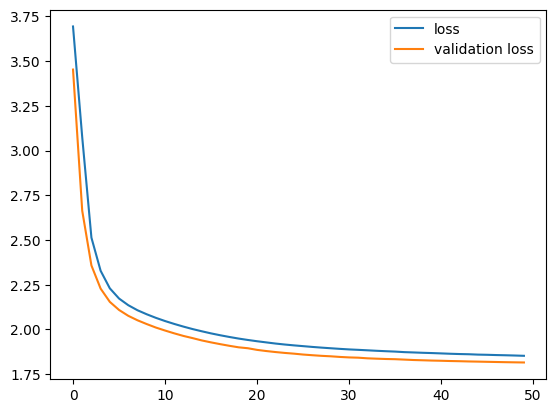

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])
plt.show()

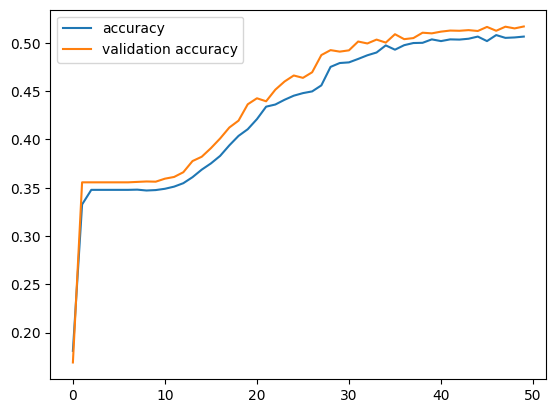

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])
plt.show()

Once the model is trained and saved to disk in a file, we can read the file and use the saved model multiple times to classify data. For example:

In [14]:
model=tf.keras.models.load_model('model_multiclass.h5')
print(np.round(model.predict(test_x[0:1]),1)[0])
print(test_y[0])

1/1 [==============================] - 0s 91ms/step
[0.  0.  0.  0.6 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


We can perform the model evaluation process on the entire test set as follows:

In [15]:
model=tf.keras.models.load_model('model_multiclass.h5')
model.evaluate(test_x,test_y)

71/71 [==============================] - 0s 1ms/step - loss: 1.8565 - accuracy: 0.5076


[1.8564679622650146, 0.5075690150260925]

---